## DGMD S-17 Robotics, Autonomous Vehicles, Drones, and Artificial Intelligence

### Object Detection, Depth Perception and Adaptive Navigation with a Tello Drone

### Group Members: Ryan Abbate, Eumar Assis, Muthukaruppan (Muthu) Annamalai

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd

## Load Telemetry data frame

In [11]:
df = pd.read_csv("./assets/telemetry.csv")
if not 'total_intensity' in list(df.columns):
    df_c = df[df['Model'] == 'DepthPerception'][['log_time', 'confidence']].rename(columns={'log_time': 'log_time', 'confidence': 'total_intensity'})
    df = pd.merge(df, df_c, on='log_time')
df['box_x_min'] = df['model output xcenter'] - (df['detected bounding box width'] / 2)
df['box_x_max'] = df['model output xcenter'] + (df['detected bounding box width'] / 2)
df['box_y_min'] = df['model output ycenter'] - (df['detected bounding box height'] / 2)
df['box_y_max'] = df['model output ycenter'] + (df['detected bounding box height'] / 2)

print(df.columns)
# df.describe()
df

Index(['log_time', 'Model', 'confidence', 'detected bounding box width',
       'detected bounding box height', 'img xcenter', 'img ycenter',
       'model output xcenter', 'model output ycenter',
       'height (distance to floor)', 'is_flying', 'total_intensity'],
      dtype='object')


,confidence,detected bounding box width,detected bounding box height,img xcenter,img ycenter,model output xcenter,model output ycenter,height (distance to floor),total_intensity
count,253.000000,253.000000,253.000000,368.0,368.0,253.000000,253.000000,368.000000,3.680000e+02
mean,0.801571,488.560087,496.527158,480.0,360.0,302.810243,181.818371,0.244565,2.278859e+08
std,0.142038,244.024276,182.939030,0.0,0.0,195.658168,169.207741,12.026083,3.213561e+07
min,0.280610,89.000000,90.000000,480.0,360.0,5.500000,-23.000000,-100.000000,1.591261e+08
25%,0.719000,256.000000,355.000000,480.0,360.0,145.500000,25.000000,0.000000,2.053526e+08
50%,0.846496,460.441925,519.000000,480.0,360.0,227.500000,113.000000,0.000000,2.276213e+08
75%,0.909000,712.000000,685.000000,480.0,360.0,486.823364,360.000000,0.000000,2.526919e+08
max,0.991947,939.234924,720.000000,480.0,360.0,811.901123,524.035156,80.000000,2.925508e+08


## 1. Comparing Azure vs. YOLO 

Comparing people detector models

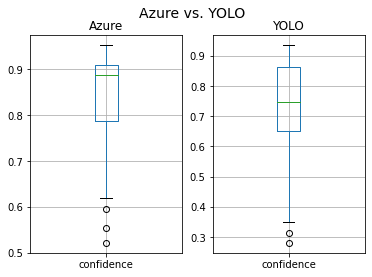

In [12]:
#Get filtered data frames
azure_df = df[df['Model'] =='AzureObjectDetector'] 

yolo_df = df[df['Model'] == 'YOLOObjectDetector']

# Plot two histograms side by side using Matplotlib
fig, axes = plt.subplots(1, 2)

fig.suptitle('Azure vs. YOLO', fontsize=14)

azure_df.boxplot('confidence', ax=axes[0])
axes[0].set_title('Azure')
yolo_df.boxplot('confidence', ax=axes[1])
axes[1].set_title('YOLO')
plt.show()



## 2. Comparing YOLO Face vs. YOLO

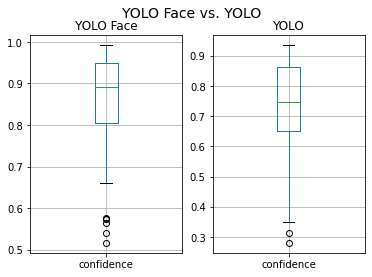

In [4]:
#Get filtered data frames
yolo_face_df = df[df['Model'] == 'YOLOFaceDetector']

# Plot two histograms side by side using Matplotlib
fig, axes = plt.subplots(1, 2)
fig.suptitle('YOLO Face vs. YOLO', fontsize=14)
yolo_face_df.boxplot('confidence', ax=axes[0])
axes[0].set_title('YOLO Face')
yolo_df.boxplot('confidence', ax=axes[1])
axes[1].set_title('YOLO')
plt.show()

## 3. Model Accuracy Histogram

Comparing accuracy of 1. YOLO, 2. YOLO Face & 3. Azure Models

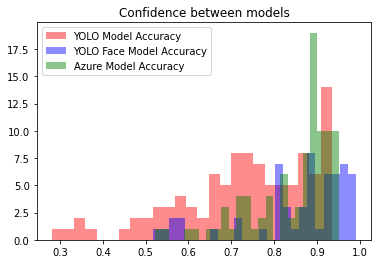

In [13]:
# plotting two histograms on the same axis
plt.hist(yolo_df['confidence'], bins=25, alpha=0.45, color='red')
plt.hist(yolo_face_df['confidence'], bins=25, alpha=0.45, color='blue')
plt.hist(azure_df['confidence'], bins=25, alpha=0.45, color='green')

plt.title("Confidence between models")
plt.legend(['YOLO Model Accuracy',
            'YOLO Face Model Accuracy',
            'Azure Model Accuracy'])
  
plt.show()

## 4. Finding person distance from camera

Comparing Computer Vision bounding boxes vs. density

Text(0, 0.5, 'Accuracy')

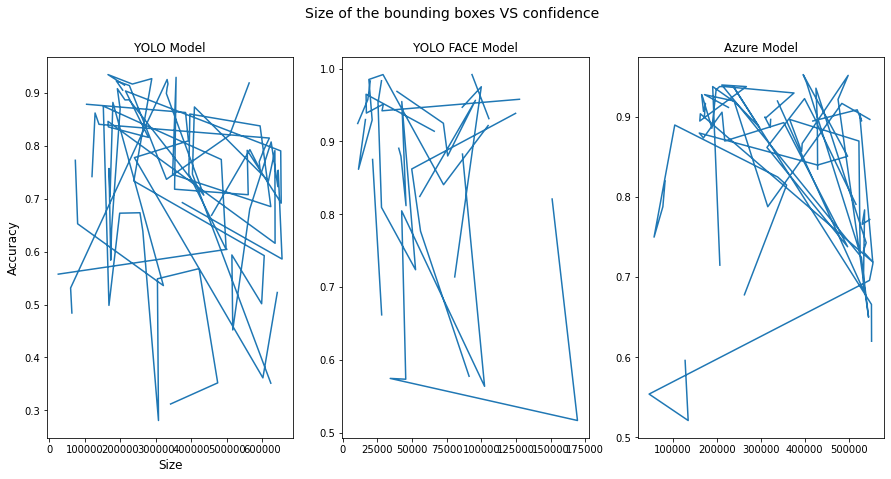

In [47]:
# Plotting the Graph
fig, axs = plt.subplots(1, 3, figsize=(15, 7))
fig.figsize=(10, 10)
fig.suptitle('Size of the bounding boxes VS confidence', fontsize=14)
axs[0].plot(yolo_df['detected bounding box width'] * yolo_df['detected bounding box height'], yolo_df.confidence)
axs[0].set_title("YOLO Model")


axs[1].plot(yolo_face_df['detected bounding box width'] * yolo_face_df['detected bounding box height'], yolo_face_df.confidence)
axs[1].set_title("YOLO FACE Model")

axs[2].plot(azure_df['detected bounding box width'] * azure_df['detected bounding box height'], azure_df.confidence)
axs[2].set_title("Azure Model")

axs[0].set_xlabel("Size", fontsize=12)
axs[0].set_ylabel("Accuracy", fontsize=12)
# plt.show()

## 5. Accuracy & Distance Bar plot

This doesn't make sense we can ignore this

Text(0, 0.5, 'Accuracy')

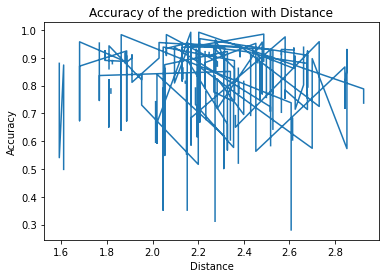

In [50]:
# Plotting the Graph
df_det = df[df['Model'] != 'DepthPerception']
plt.plot(df_det.total_intensity/100000000, df_det.confidence)
plt.title("Accuracy of the prediction with Distance")
plt.xlabel("Distance")
plt.ylabel("Accuracy")

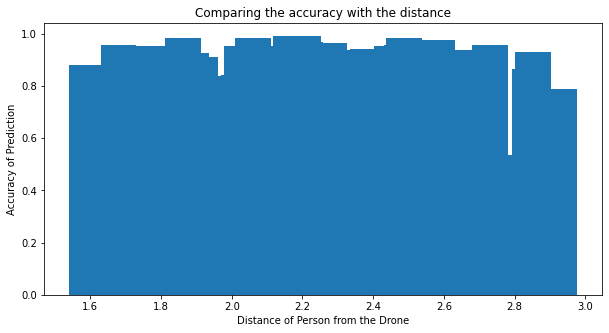

In [48]:
df_det = df[df['Model'] != 'DepthPerception']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(df_det.total_intensity/100000000, df_det.confidence, width = 0.1)
 
plt.xlabel("Distance of Person from the Drone")
plt.ylabel("Accuracy of Prediction")
plt.title("Comparing the accuracy with the distance")
plt.show()